Basic e.d.a. on Heartscore data


In [76]:
import numpy as np
import scipy as sc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
import sys
from collections import Counter
from collections import namedtuple

In [2]:
os.chdir("T:\laupodteam\AIOS\Bram")

In [12]:
HS = pd.read_excel("data/HeartScore/Data/HS_list.xlsx")
HS.drop(['Review_Imo', 'Review_Mark', 'Review_remark', 'newHS'], inplace=True, axis=1)

In [21]:
meta_cols = ['Id', 'Obs', 'pathos_key', 'upod_id', 'DOB', 'hos_startdt'] 
cols = HS.columns.tolist()
col_change = {_col: 'meta_'+_col for _col in cols if _col in meta_cols}
col_change.update({_col: 'var_'+_col for _col in cols if _col not in meta_cols})
HS.rename(index=str, columns=col_change, inplace=True)

In [47]:
# convert bool in int64
for _col in HS.columns.tolist():
    if str(HS[_col].dtype)=='bool':
        HS[_col] = HS[_col].astype(int)
        
HS_text=HS[['meta_Id', 'meta_Obs', 'meta_pathos_key', 'meta_upod_id', 'meta_DOB', 'var_medhistorySEH']]
HS.drop('var_medhistorySEH', axis=1, inplace=True)

In [69]:
target = 'var_casestatus'
HS.rename(index=str, columns={'var_casestatus': 'target'}, inplace=True)

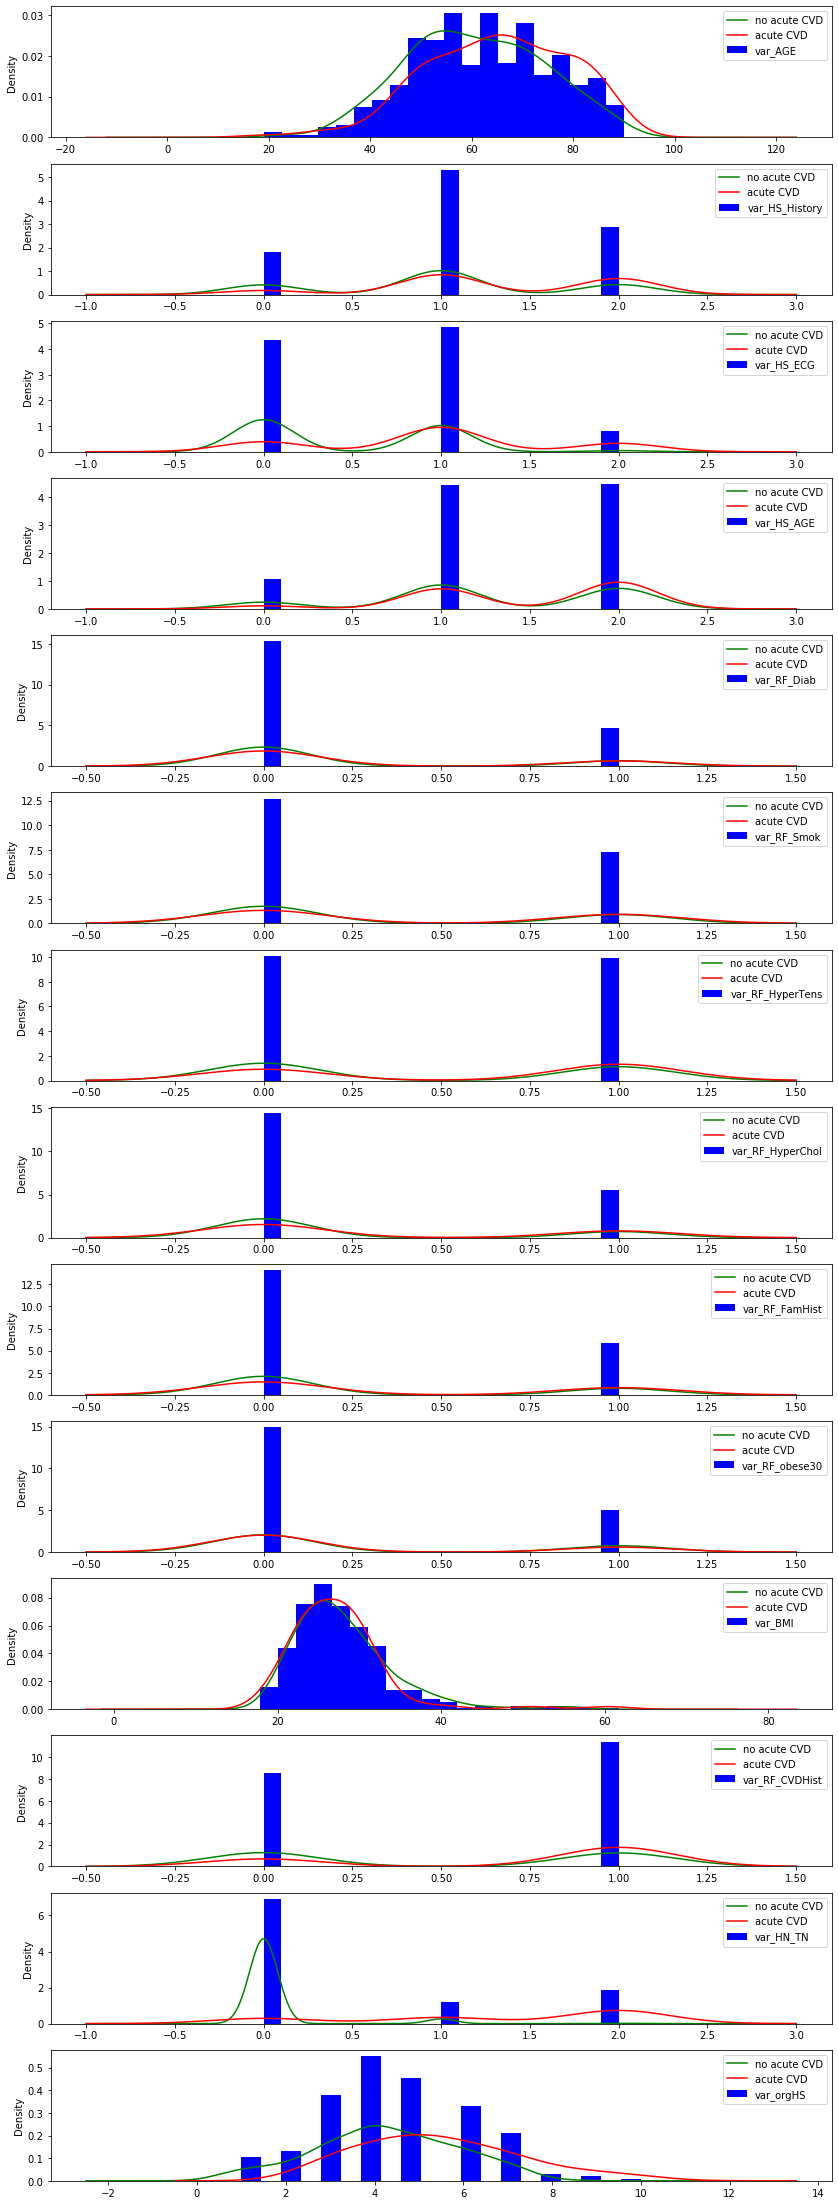

In [82]:
var_cols = [_col for _col in HS.columns.tolist() if 'var_' in _col]
fig, ax = plt.subplots(figsize=(14,40), nrows=len(var_cols))
for idx, var_col in enumerate(var_cols):
    HS.loc[:, var_col].plot.hist(bins=20, color='blue', density=True, ax=ax[idx])
    HS.loc[HS.target==0, var_col].plot.kde(color='green', label='no acute CVD', ax=ax[idx])
    HS.loc[HS.target==1, var_col].plot.kde(color='red', label='acute CVD', ax=ax[idx])
    ax[idx].legend()    

In [65]:
# information gain per feature
# delta(1-entropy)



# information gain per feature pair
# polynomial expansion
from sklearn.preprocessing import PolynomialFeatures as PF

Expander = PF(degree=2, interaction_only=False, include_bias=False)
ExpDF = pd.DataFrame(Expander.fit_transform(HS.fillna(0).loc[:, var_cols]))
FeatureNames = Expander.get_feature_names(HS.loc[:, var_cols].columns)
ExpDF.columns = FeatureNames
ExpDF.loc[:, 'target'] = HS['target'].values

# seperation score (KS/Wasserstein/MWU)

# supervised dim reduce plus density-based clustering

# Logistic Regression with polynomial expansion
# Add features in order of feature pair

# biGAM's

# RF with permutation importance